In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = r"C:\Users\luvpi\OneDrive\Desktop\5th semester proj\final project\archive\phishing_site_urls.csv"



df = pd.read_csv(file_path)

In [3]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [4]:
df.shape

(549346, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
df.Label.value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

In [8]:
from nltk.tokenize import RegexpTokenizer

In [9]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [10]:
df.URL[0]

'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [11]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [12]:
df['text_tokenized']=df.URL.map(lambda t :tokenizer.tokenize(t))

In [13]:
df.head()

,URL,Label,text_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [14]:
from nltk.stem.snowball import SnowballStemmer

In [15]:
Stemmer=SnowballStemmer('english')

In [16]:
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [Stemmer.stem(word) for word in l])


In [17]:
df.head()

,URL,Label,text_tokenized,text_stemmed
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide..."


In [18]:
df['text']=df['text_stemmed'].map(lambda l:' '.join(l))

In [19]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [20]:
good_sits =df[df.Label=='good'] 
bad_sits =df[df.Label=='bad'] 

In [21]:
good_sits.head()

,URL,Label,text_tokenized,text_stemmed,text
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0, 16.0),
                   title=None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com', 'http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          mask=mask)
    wordcloud.generate(text)

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size,
                                   'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                   'verticalalignment': 'bottom'})

    plt.axis('off')
    plt.tight_layout()


In [24]:
all_text =' '.join(good_sits['text'].tolist())

In [25]:
from wordcloud import WordCloud

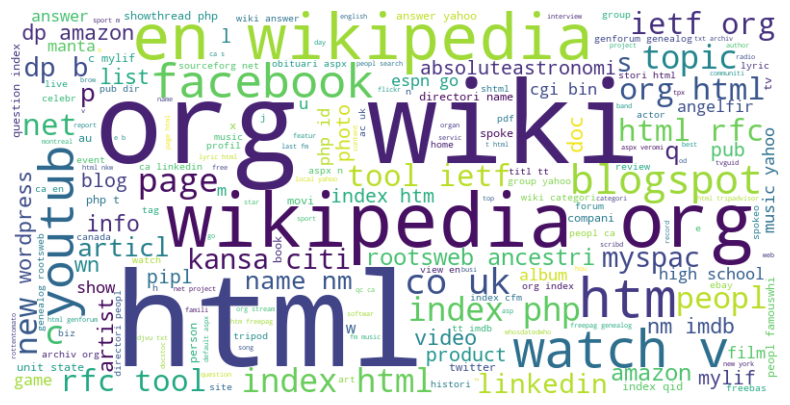

In [26]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
all_text =' '.join(bad_sits['text'].tolist())

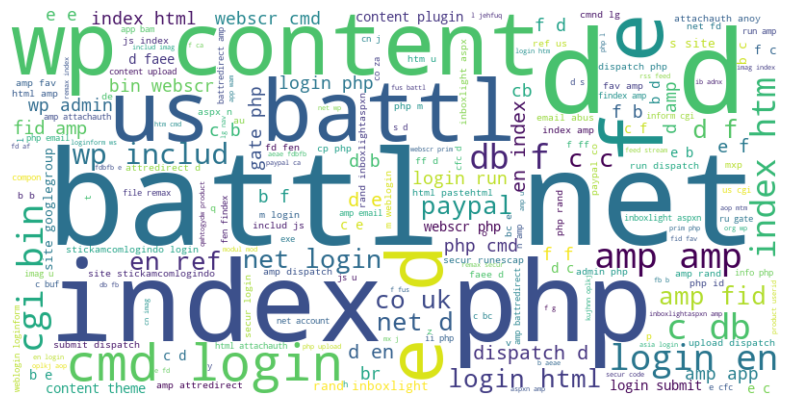

In [28]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [30]:
from sklearn.feature_extraction.text import CountVectorizer


In [31]:
cv=CountVectorizer()

In [32]:
fetures=cv.fit_transform(df.text)

In [33]:
fetures[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(fetures, df.Label,test_size=0.2)

Model tranning

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
l_model = LogisticRegression

In [38]:
from sklearn.linear_model import LogisticRegression


l_model = LogisticRegression()


l_model.fit(x_train, y_train)



C:\Users\luvpi\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
l_model.score(x_test,y_test)

0.9652134340584327

In [40]:
l_model.score(x_train,y_train)

0.978419754434827

In [41]:
from sklearn.metrics import classification_report

In [42]:
print('\nCLASSIFICATION REPORT\n')
print(classification_report(l_model.predict(x_test), y_test, target_names=['Bad','Good']))



CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     29521
        Good       0.99      0.96      0.98     80349

    accuracy                           0.97    109870
   macro avg       0.95      0.97      0.96    109870
weighted avg       0.97      0.97      0.97    109870



In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
from sklearn.metrics import confusion_matrix
import pandas as pd


con_mat = pd.DataFrame(
    confusion_matrix(y_test, l_model.predict(x_test)),
    columns=['Predicted:Bad', 'Predicted:Good'],
    index=['Actual:Bad', 'Actual:Good']
)


In [45]:
import seaborn as sns


CONFUSION MATRIX


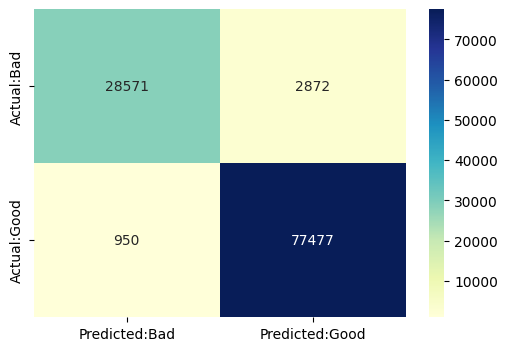

In [46]:

print('\nCONFUSION MATRIX')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:

mnb = MultinomialNB()

In [49]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [50]:
mnb.score(x_test,y_test)

0.9579594065714025

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [52]:
y_pred_nb = mnb.predict(x_test)

In [53]:
print("ACCURACY (Multinomial Naive Bayes):", round(accuracy_score(y_test, y_pred_nb) * 100, 2), "%\n")


ACCURACY (Multinomial Naive Bayes): 95.8 %



In [54]:
# Detailed Report
print("CLASSIFICATION REPORT (Multinomial Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb))

CLASSIFICATION REPORT (Multinomial Naive Bayes):

              precision    recall  f1-score   support

         bad       0.94      0.92      0.93     31443
        good       0.97      0.97      0.97     78427

    accuracy                           0.96    109870
   macro avg       0.95      0.95      0.95    109870
weighted avg       0.96      0.96      0.96    109870



In [55]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
con_mat_nb = pd.DataFrame(
    confusion_matrix(y_test, mnb.predict(x_test)),
    columns=['Predicted:Bad', 'Predicted:Good'],
    index=['Actual:Bad', 'Actual:Good']
)


CONFUSION MATRIX (Multinomial Naive Bayes)


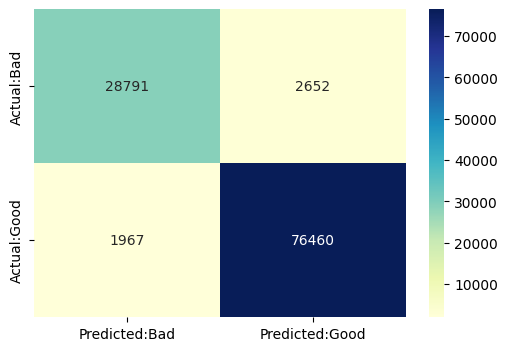

In [57]:
print('\nCONFUSION MATRIX (Multinomial Naive Bayes)')
plt.figure(figsize=(6,4))
sns.heatmap(con_mat_nb, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

## save model

In [58]:
import pickle

In [59]:
pickle.dump(l_model, open('phishing_lr.pkl','wb'))

In [60]:
pickle.dump(mnb, open('phishing_nb.pkl','wb'))


In [61]:
pickle.dump(cv, open('vectorizer.pkl','wb'))


In [ ]:
# Bad links (Phishing sites)
predict_bad = [
    "google-secure-login.com",
    "paypal.verify-account-login.com",
    "amazon-login-update.com",
    "appleid.security-alerts.com",
    "github.verify-login-security.net",
    "yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php",
    "fazan-pacir.rs/temp/libraries/ipad",
    "www.tubemoviez.exe",
]

# Good links (Legitimate sites)
predict_good = [
    "www.google.com",
    "www.amazon.in",
    "www.netflix.com",
    "www.microsoft.com",
    "www.apple.com",
    "www.linkedin.com",
    "github.com",
    "wikipedia.org",
    "www.nike.com",
    "www.youtube.com/",
    "www.goggle.com/",
    "youtube.com/watch?v=qIQTQJ13vdU",
    "www.retailhellunderground.com/",
    "restorevisioncenters.com/html/technology.html"
]

In [63]:
predict_good = cv.transform(predict_good)


In [64]:
predict_bad = cv.transform(predict_bad)


In [65]:
l_model.predict(predict_good)

array(['good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good'],
      dtype=object)

In [66]:
l_model.predict(predict_bad)

array(['bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'bad', 'good'], dtype=object)

In [67]:
mnb.predict(predict_good)

array(['bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good'],
      dtype='<U4')

In [68]:
mnb.predict(predict_bad)

array(['bad', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'bad', 'bad'], dtype='<U4')